# -------Forward Propagation ---------#

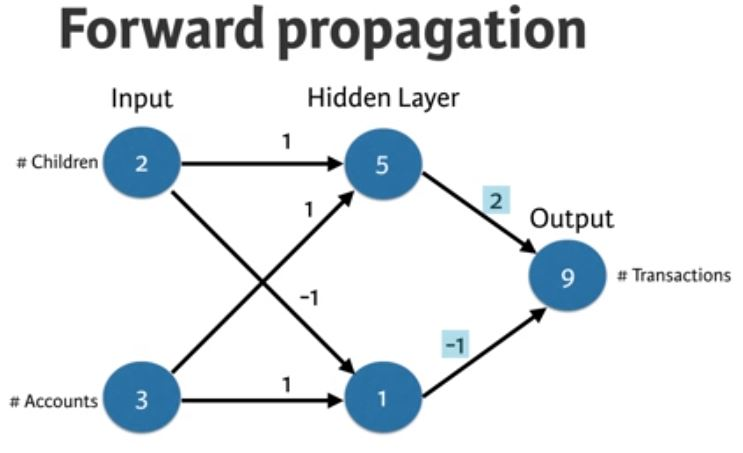

In [10]:
from IPython.display import Image
Image(filename = 'Forward_propagation.jpg', width= 500, height = 400)

In [16]:
import numpy as np
input_data  = np.array([2,3])

node0_weights = np.array([1, 1])
node1_weights = np.array([-1, 1])
output_weights = np.array([2, -1])

node0_value = (input_data*node0_weights).sum()
node1_value =  (input_data*node1_weights).sum()
output_value = (np.array([node0_value, node1_value])*output_weights).sum()
output_value

9

# ---------Activation functions------------#


An "activation function" is a function applied at each node. It converts the node's input into some output.

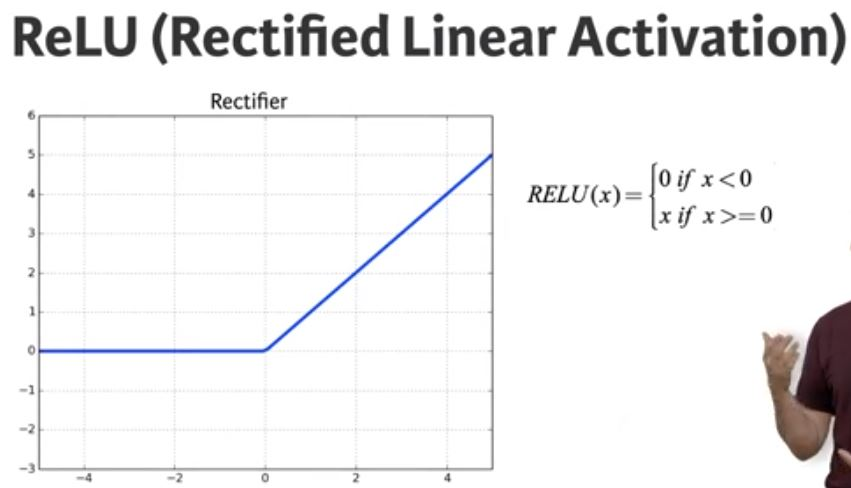

In [17]:
Image(filename='ReLU.JPG', width= 500, height = 400)

In [18]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)
    
    # Return the value just calculated
    return(output)

# ---- How does Deep Learning help? -----#

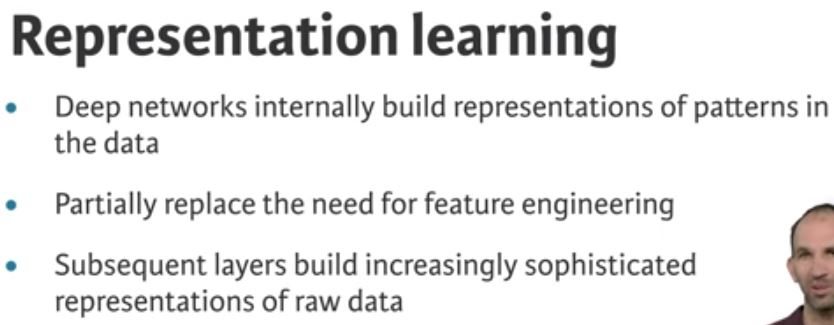

In [23]:
Image(filename='Deep_Learning.JPG', width= 600, height = 500)

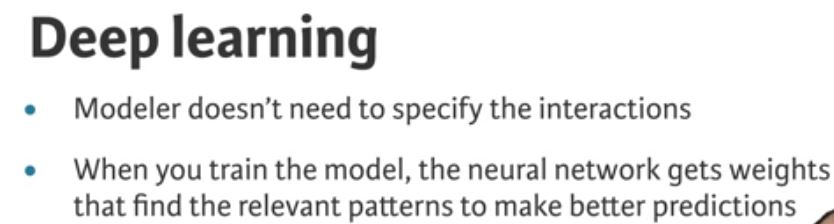

In [24]:
Image(filename='Deep_Learning_2.JPG', width= 600, height = 500)

# ------ Loss functions --------#

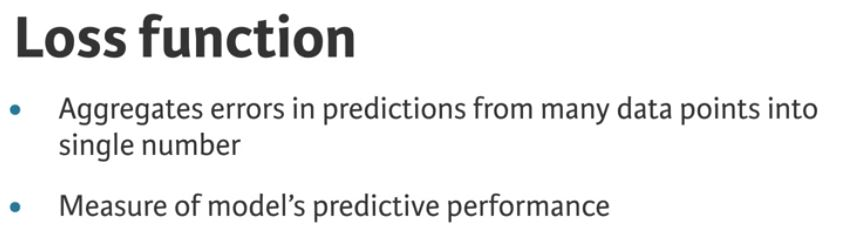

In [27]:
Image(filename='Loss_Functions.JPG', width= 600, height = 500)

Generally mse (mean squared error) is used. Our goal is to find **minimum value of loss function** for given set of inputs. The minimum value is calculated by **gradiant descent.**

# -------------Example --------------#

In [48]:
# imports
from sklearn.metrics import mean_squared_error

# Inputs

input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
weights_0 = {'output': np.array([1, 1]), 'node_1': np.array([1, 2]), 'node_0': np.array([2, 1])}
weights_1 = {'output': np.array([1. , 1.5]), 'node_1': np.array([1. , 1.5]), 'node_0': np.array([2, 1])}

# Expected output 
target_actuals = [1, 3, 5, 7]

# Function

def predict_with_network(input_row, weights):
    node0_input = (input_row*weights['node_0']).sum()
    node0_output = max(node0_input, 0)
    node1_input = (input_row*weights['node_1']).sum()
    node1_output = max(node1_input, 0)
    output_value = (np.array([node0_output, node1_output])*weights['output']).sum()
    
    return output_value

model0_output = []
model1_output = []

for input_row in input_data:
    model0_output.append(predict_with_network(input_row, weights_0))
    model1_output.append(predict_with_network(input_row, weights_1))


model0_error = mean_squared_error(target_actuals, model0_output) 
model1_error = mean_squared_error(target_actuals, model1_output) 

print("The model 0 error value is : %f" %model0_error)
print("The model 1 error value is : %f" %model1_error)
# print(model0_output)
# print(model1_output)

The model 0 error value is : 37.500000
The model 1 error value is : 49.890625


# ---Gradiant descent - slope calculation -----#

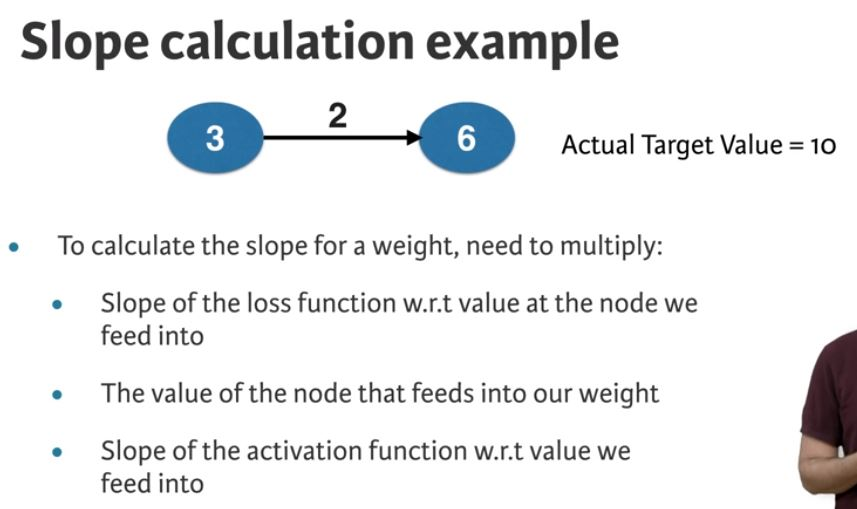

In [49]:
Image(filename='Slope_Calculation.JPG', width= 600, height = 500)

# ----- Example / Slope Cal---------- #

In [57]:
# Input 
weights  = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
learning_rate = 0.01

# Output 
target = 0

# Calculations
preds = (weights*input_data).sum()
error = preds - target
slope = 2*error*input_data

weights_rev = weights - (learning_rate*slope)
preds_rev = (weights_rev*input_data).sum()
error_rev = preds_rev - target

print("Error before and after are", (error, error_rev))

Error before and after are (7, 5.04)


If above process is iterated for 20 times, below is the graph we get - 

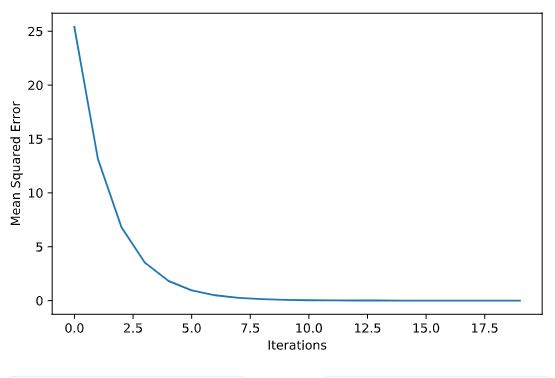

In [58]:
Image(filename='weights and mse.JPG', width= 600, height = 500)

# -------Back Propagation ---------#

Each time you generate predictions using forward propagation, you update the weights using backward propagation.

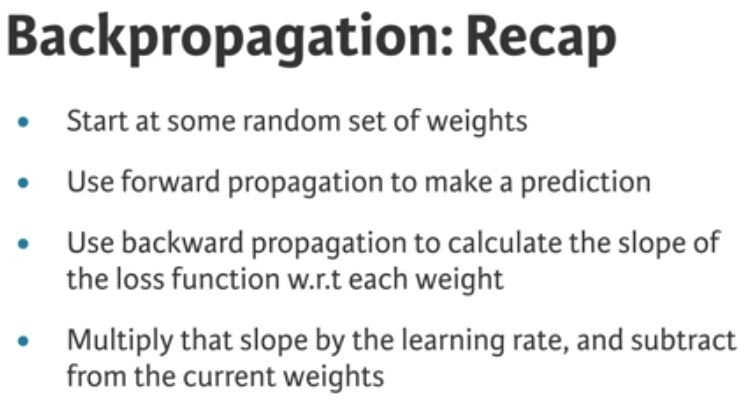

In [61]:
Image(filename='Back_Propagation.JPG', width= 500, height = 400)

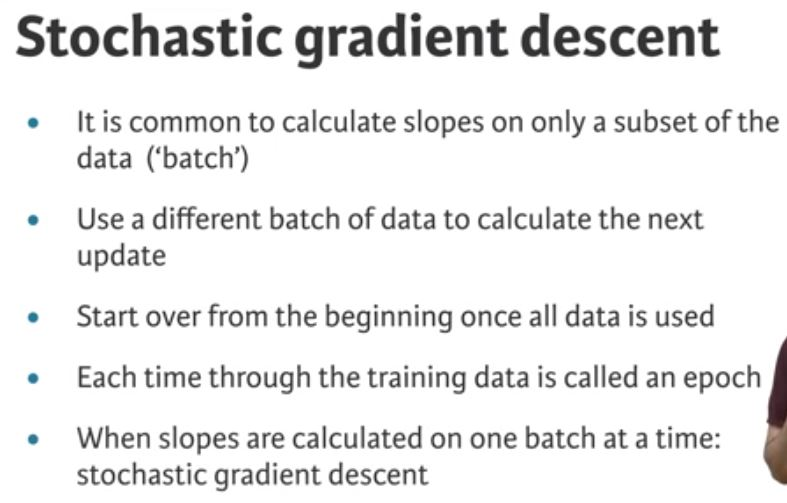

In [62]:
Image(filename='Stochastic_descent.JPG', width= 500, height = 400)

# -----------Creating a keras model--------------#


In [70]:
# Data Prep
import pandas as pd 

df = pd.read_csv('./hourly_wages.csv')

predictors  = df[['union', 'education_yrs', 'experience_yrs', 'age','female', 'marr', 'south', 'manufacturing', 'construction']]
predictors = np.asarray(predictors)

target = df['wage_per_hour']
target = np.asarray(target)

In [80]:
# Build a model

import keras 
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation = 'relu', input_shape=(n_cols, )))

# Add the Second layer
model.add(Dense(32, activation = 'relu'))

# Add the Output layer
model.add(Dense(1))

# Compile the model
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

# Fit the model 
model.fit(predictors, target, epochs=10)

Epoch 1/10
534/534 [==============================] - 0s 514us/step - loss: 26.9940
Epoch 2/10
534/534 [==============================] - 0s 35us/step - loss: 22.1684
Epoch 3/10
534/534 [==============================] - 0s 45us/step - loss: 21.9999
Epoch 4/10
534/534 [==============================] - 0s 39us/step - loss: 21.5465
Epoch 5/10
534/534 [==============================] - 0s 52us/step - loss: 21.5519
Epoch 6/10
534/534 [==============================] - 0s 43us/step - loss: 21.4182
Epoch 7/10
534/534 [==============================] - 0s 49us/step - loss: 21.9747
Epoch 8/10
534/534 [==============================] - 0s 54us/step - loss: 21.1551
Epoch 9/10
534/534 [==============================] - 0s 41us/step - loss: 20.8251
Epoch 10/10
534/534 [==============================] - 0s 54us/step - loss: 21.0090


In [109]:
# Predict 
predictors_test = np.array([[ 0,  8, 21, 35, 1, 1,  0,  1,  0]])
model.predict(predictors_test)

array([[5.9538417]], dtype=float32)

# -----------Classification models--------------#


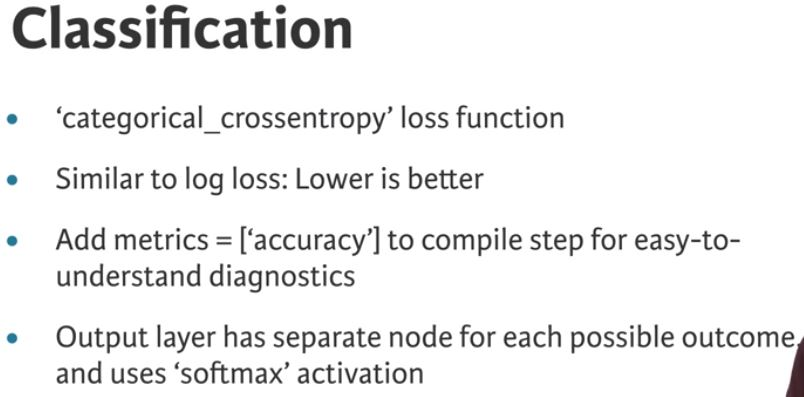

In [110]:
Image(filename='classification.JPG', width= 500, height = 400)

In [117]:
# ---Example------

# Data Prep
import pandas as pd 
from keras.utils import to_categorical

df = pd.read_csv('./titanic_all_numeric.csv')

predictors = df.drop(columns = ['survived']).as_matrix()

target = to_categorical(df.survived)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [143]:
# Model build 

n_cols = predictors.shape[1]
print("No of predictors : ", n_cols)

model_class = Sequential()

model_class.add(Dense(32, activation = 'relu', input_shape = (n_cols, )))
model_class.add(Dense(2, activation = 'softmax'))

model_class.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'] , optimizer = 'adam')

model_class.fit(predictors, target, epochs = 10)

No of predictors :  10
Epoch 1/10
891/891 [==============================] - 1s 772us/step - loss: 1.2380 - acc: 0.4725
Epoch 2/10
891/891 [==============================] - 0s 40us/step - loss: 0.7350 - acc: 0.6813
Epoch 3/10
891/891 [==============================] - 0s 48us/step - loss: 0.6392 - acc: 0.6667
Epoch 4/10
891/891 [==============================] - 0s 48us/step - loss: 0.6095 - acc: 0.6869
Epoch 5/10
891/891 [==============================] - 0s 43us/step - loss: 0.5935 - acc: 0.6970
Epoch 6/10
891/891 [==============================] - 0s 43us/step - loss: 0.5785 - acc: 0.6925
Epoch 7/10
891/891 [==============================] - 0s 47us/step - loss: 0.5653 - acc: 0.7048
Epoch 8/10
891/891 [==============================] - 0s 37us/step - loss: 0.5653 - acc: 0.7127
Epoch 9/10
891/891 [==============================] - 0s 48us/step - loss: 0.5515 - acc: 0.7104
Epoch 10/10
891/891 [==============================] - 0s 38us/step - loss: 0.5476 - acc: 0.7205


In [125]:
# print model summary
model_class.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 66        
Total params: 418
Trainable params: 418
Non-trainable params: 0
_________________________________________________________________


In [130]:
# Save & Reload the model

from keras.models import load_model
model_class.save('model_class.h5')

my_model = load_model('model_class.h5')


# Prediction test

test = np.array([[3, 22.0, 1, 0, 7.25, 1, False, 0, 0, 1], [1, 38.0, 1, 0, 71.2833, 0, False, 1, 0, 0]])
predictions = my_model.predict(test)
predictions[:, 1]

array([0.26881212, 0.63052726], dtype=float32)

### ---------------another optmizer SGD Stochastic Gradient Descent ----------------#

Uses fixed learning rate for fitting the model 

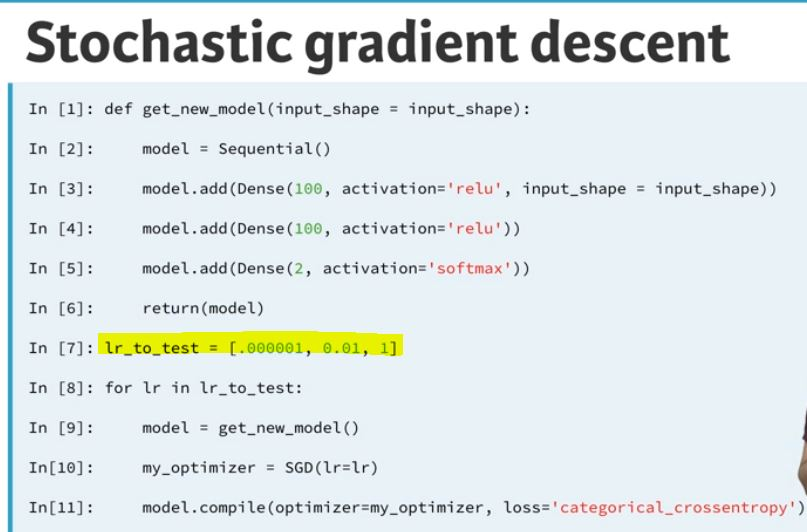

In [144]:
Image(filename='sgd.JPG', width= 500, height = 400)

# ---------------Fine-tuning keras models----------------#

**The dying neuron problem /Vanishing gradiants **: This type of problem occures when neuron (node) takes less then 0 value for all rows of data. For example in below case, while using relu activation, the value of output and slope both will be 0. Hence the weights wn;t get updated.

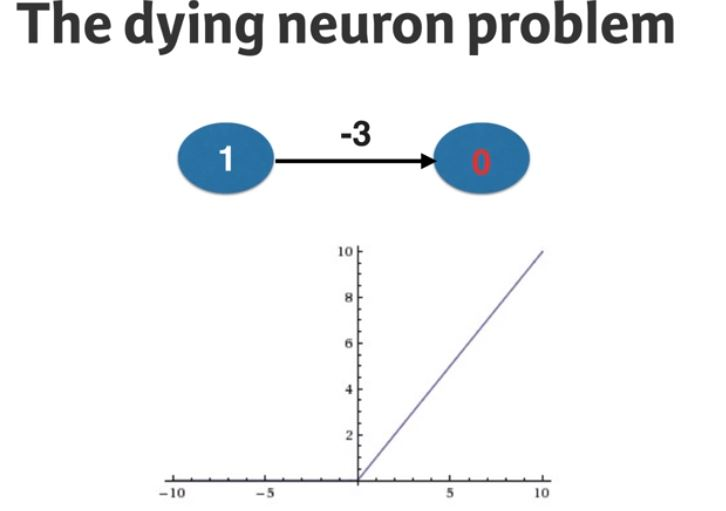

In [131]:
Image(filename='dying_neuron.JPG', width= 500, height = 400)

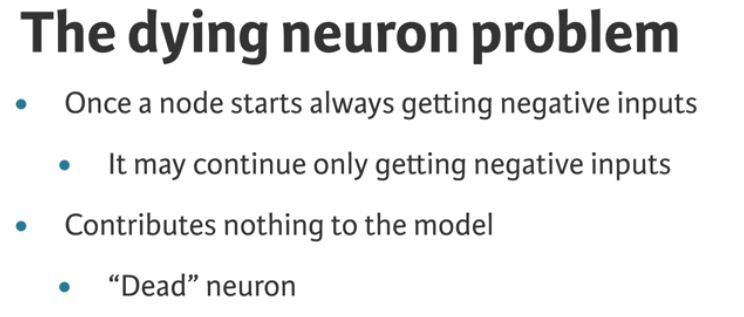

In [132]:
Image(filename='dying_neuron_2.JPG', width= 500, height = 400)

# ---------------Model validation----------------#

### Use of validation_split & EarlyStopping
Earlystopping stops the fitting if val_loss doesn't improve beyond number of interations  = patience specified

In [142]:
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience = 5)

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split = 0.30, epochs = 30, callbacks = [early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 1s 1ms/step - loss: 1.0863 - acc: 0.5923 - val_loss: 0.8449 - val_acc: 0.5522
Epoch 2/30
623/623 [==============================] - 0s 78us/step - loss: 0.7414 - acc: 0.6083 - val_loss: 0.6752 - val_acc: 0.6418
Epoch 3/30
623/623 [==============================] - 0s 70us/step - loss: 0.6493 - acc: 0.6453 - val_loss: 0.6162 - val_acc: 0.7015
Epoch 4/30
623/623 [==============================] - 0s 61us/step - loss: 0.7098 - acc: 0.6709 - val_loss: 0.7702 - val_acc: 0.6418
Epoch 5/30
623/623 [==============================] - 0s 69us/step - loss: 0.6564 - acc: 0.6501 - val_loss: 0.7106 - val_acc: 0.7164
Epoch 6/30
623/623 [==============================] - 0s 59us/step - loss: 0.6133 - acc: 0.6950 - val_loss: 0.5007 - val_acc: 0.7500
Epoch 7/30
623/623 [==============================] - 0s 59us/step - loss: 0.6974 - acc: 0.6404 - val_loss: 0.5995 - val_acc: 0.7201
Epoch 8/30
623/623 [====

# ---------- Experimenting with wider networks -----------------
### Blue = 100 nodes vs red 10 nodes in hidden layers. Seems like blue performed better overall but had more fluctuations

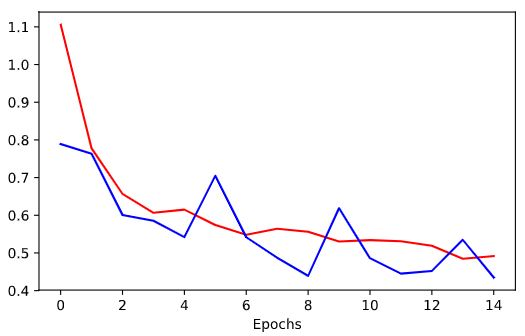

In [146]:
Image(filename='wider_network.JPG', width= 500, height = 400)

# ---------- Experimenting with more layers in networks -----------------
### Blue = 3 Layers vs red 1 layers. Seems like blue performed better overall but had more fluctuations

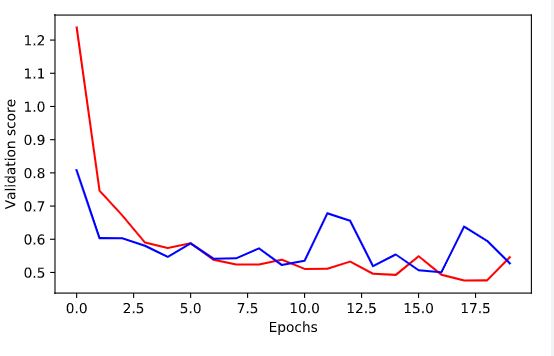

In [147]:
Image(filename='layers_network.JPG', width= 500, height = 400)

# ---------- Model Capacity -----------------
### Adding more capacity to model means either adding more nodes to hidden layers or adding more hidden layers or both

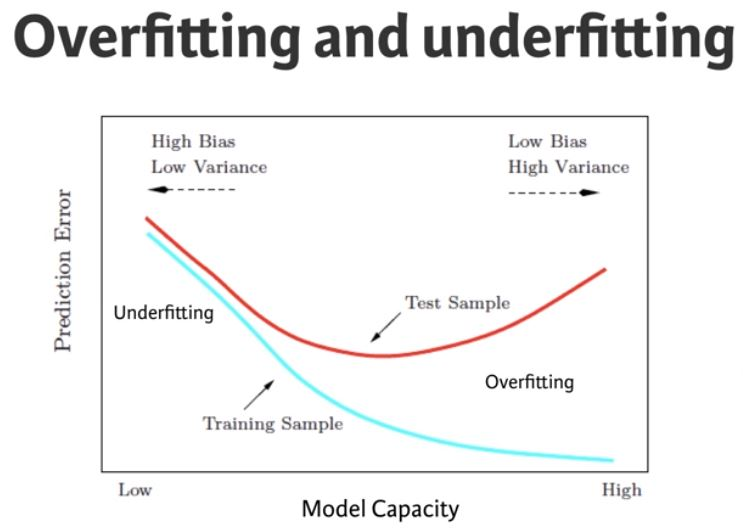

In [150]:
Image(filename='model_capacity.JPG', width= 500, height = 400)